# Step-1: Install necessary libraries

In [50]:
!pip install pandas
!pip install yfinance
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


# Step-2: Import necessary libraries

In [51]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Step-3: Define the ticker symbol and the date range

In [52]:
ticker = 'EURINR=X'
start_date = '2023-01-01'
end_date = '2024-09-30'

# Step-4: Fetch historical data from Yahoo Finance 
https://finance.yahoo.com/quote/EURINR=X/history/

In [53]:
data = yf.download(ticker, start=start_date, end=end_date)

# Display the initial structure of the DataFrame
print("Initial DataFrame structure:")
print(data.head())

[*********************100%***********************]  1 of 1 completed

Initial DataFrame structure:
Price                      Adj Close      Close       High        Low  \
Ticker                      EURINR=X   EURINR=X   EURINR=X   EURINR=X   
Date                                                                    
2023-01-02 00:00:00+00:00  88.482002  88.482002  88.400002  87.157700   
2023-01-03 00:00:00+00:00  88.300003  88.300003  88.313004  87.225998   
2023-01-04 00:00:00+00:00  87.219002  87.219002  87.922997  87.219002   
2023-01-05 00:00:00+00:00  87.605003  87.605003  87.807999  86.757004   
2023-01-06 00:00:00+00:00  86.827003  86.827003  87.614998  86.647003   

Price                           Open   Volume  
Ticker                      EURINR=X EURINR=X  
Date                                           
2023-01-02 00:00:00+00:00  87.157700        0  
2023-01-03 00:00:00+00:00  88.292000        0  
2023-01-04 00:00:00+00:00  87.219002        0  
2023-01-05 00:00:00+00:00  87.580002        0  
2023-01-06 00:00:00+00:00  86.819000        0  


# Step-5: Flatten the DataFrame

In [54]:
data.columns = ['_'.join(col).strip() for col in data.columns.values]

# Check the available columns
print("Available columns after flattening:")
print(data.columns)

Available columns after flattening:
Index(['Adj Close_EURINR=X', 'Close_EURINR=X', 'High_EURINR=X', 'Low_EURINR=X',
       'Open_EURINR=X', 'Volume_EURINR=X'],
      dtype='object')


# Step-6: Confirm the column names

In [55]:
close_column_name = [col for col in data.columns if 'Close' in col]
high_column_name = [col for col in data.columns if 'High' in col]
low_column_name = [col for col in data.columns if 'Low' in col]
print(f"Identified Close column: {close_column_name}")

# If the close column was not identified, print an error message
if not close_column_name:
    raise ValueError("Close column not found in the DataFrame.")
if not high_column_name:
    raise ValueError("High column not found in the DataFrame.")
if not low_column_name:
    raise ValueError("Low column not found in the DataFrame.")

Identified Close column: ['Adj Close_EURINR=X', 'Close_EURINR=X']


# Step-7: Calculate Moving Averages

In [56]:
data['MA_20'] = data[close_column_name[0]].rolling(window=20).mean()
data['MA_50'] = data[close_column_name[0]].rolling(window=50).mean()

# Step-8: Calculate Rolling Standard Deviation for Bollinger Bands

In [57]:
data['Rolling_Std'] = data[close_column_name[0]].rolling(window=20).std()

# Calculate Bollinger Bands
data['Upper_Band'] = data['MA_20'] + (data['Rolling_Std'] * 2)
data['Lower_Band'] = data['MA_20'] - (data['Rolling_Std'] * 2)

# Step-9: Calculate CCI (Commodity Channel Index)

In [58]:
typical_price = (data[close_column_name[0]] + data[high_column_name[0]] + data[low_column_name[0]]) / 3
data['SMA'] = typical_price.rolling(window=20).mean()

# Calculate the Mean Absolute Deviation (MAD)
def mean_absolute_deviation(x):
    return (abs(x - x.mean())).mean()

data['MAD'] = typical_price.rolling(window=20).apply(mean_absolute_deviation)
data['CCI'] = (typical_price - data['SMA']) / (0.015 * data['MAD'])

# Step-10: Check for NaNs

In [59]:
print(f"\nMA_20 length: {len(data['MA_20'])}, NaNs in MA_20: {data['MA_20'].isna().sum()}")
print(f"Rolling Std length: {len(data['Rolling_Std'])}, NaNs in Rolling Std: {data['Rolling_Std'].isna().sum()}")
print(f"CCI length: {len(data['CCI'])}, NaNs in CCI: {data['CCI'].isna().sum()}")


MA_20 length: 455, NaNs in MA_20: 19
Rolling Std length: 455, NaNs in Rolling Std: 19
CCI length: 455, NaNs in CCI: 19


# Step-11: Display the final DataFrame with Bollinger Bands and CCI

In [60]:
print("\nFinal DataFrame with Bollinger Bands and CCI:")
print(data[[close_column_name[0], 'MA_20', 'MA_50', 'Upper_Band', 'Lower_Band', 'CCI']].tail())


Final DataFrame with Bollinger Bands and CCI:
                           Adj Close_EURINR=X     MA_20      MA_50  \
Date                                                                 
2024-09-23 00:00:00+00:00           93.110001  92.94000  92.078282   
2024-09-24 00:00:00+00:00           92.753998  92.89905  92.113302   
2024-09-25 00:00:00+00:00           93.438004  92.88485  92.162082   
2024-09-26 00:00:00+00:00           93.000999  92.86995  92.195082   
2024-09-27 00:00:00+00:00           93.367996  92.89445  92.240082   

                           Upper_Band  Lower_Band         CCI  
Date                                                           
2024-09-23 00:00:00+00:00   93.752240   92.127760  -15.155519  
2024-09-24 00:00:00+00:00   93.657735   92.140366    2.106169  
2024-09-25 00:00:00+00:00   93.587223   92.182478  152.514953  
2024-09-26 00:00:00+00:00   93.547535   92.192365   82.080554  
2024-09-27 00:00:00+00:00   93.607754   92.181146  120.854816  


# Step-12: Decision Logic for BUY, SELL, NEUTRAL

In [61]:
decisions = []

for index, row in data.iterrows():
    decision = 'NEUTRAL'
    
    # Moving Averages decision
    if row['MA_20'] > row['MA_50']:
        decision = 'BUY'
    elif row['MA_20'] < row['MA_50']:
        decision = 'SELL'
    
    # Bollinger Bands decision
    if row[close_column_name[0]] > row['Upper_Band']:
        decision = 'SELL'
    elif row[close_column_name[0]] < row['Lower_Band']:
        decision = 'BUY'
    
    # CCI decision
    if row['CCI'] > 100:
        decision = 'SELL'
    elif row['CCI'] < -100:
        decision = 'BUY'
    
    decisions.append(decision)

# Add decisions to the DataFrame
data['Decision'] = decisions


# Step-13: Display the last few rows with decisions

In [65]:
print("\nFinal DataFrame with Decisions:")
print(data[['Decision', close_column_name[0], 'MA_20', 'MA_50', 'Upper_Band', 'Lower_Band', 'CCI']])


Final DataFrame with Decisions:
                          Decision  Adj Close_EURINR=X     MA_20      MA_50  \
Date                                                                          
2023-01-02 00:00:00+00:00  NEUTRAL           88.482002       NaN        NaN   
2023-01-03 00:00:00+00:00  NEUTRAL           88.300003       NaN        NaN   
2023-01-04 00:00:00+00:00  NEUTRAL           87.219002       NaN        NaN   
2023-01-05 00:00:00+00:00  NEUTRAL           87.605003       NaN        NaN   
2023-01-06 00:00:00+00:00  NEUTRAL           86.827003       NaN        NaN   
...                            ...                 ...       ...        ...   
2024-09-23 00:00:00+00:00      BUY           93.110001  92.94000  92.078282   
2024-09-24 00:00:00+00:00      BUY           92.753998  92.89905  92.113302   
2024-09-25 00:00:00+00:00     SELL           93.438004  92.88485  92.162082   
2024-09-26 00:00:00+00:00      BUY           93.000999  92.86995  92.195082   
2024-09-27 00:00:00

# Step-14: Plotting

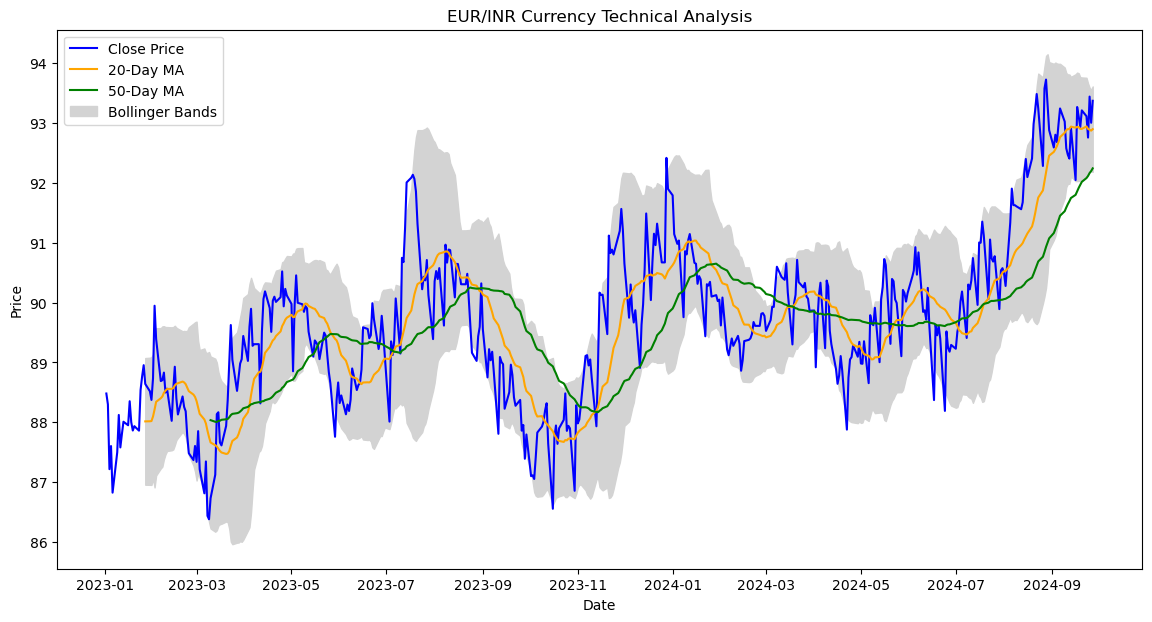

In [63]:
plt.figure(figsize=(14, 7))
plt.plot(data[close_column_name[0]], label='Close Price', color='blue')
plt.plot(data['MA_20'], label='20-Day MA', color='orange')
plt.plot(data['MA_50'], label='50-Day MA', color='green')
plt.fill_between(data.index, data['Upper_Band'], data['Lower_Band'], color='lightgray', label='Bollinger Bands')
plt.title('EUR/INR Currency Technical Analysis')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [66]:
import pandas as pd
# Specify the columns you want to include in the Excel file
columns_to_save = ['Decision', 'Adj Close_EURINR=X', 'MA_20', 'MA_50', 'Upper_Band', 'Lower_Band', 'CCI']

# Saving the last 20 rows to the specified location
data[columns_to_save].to_excel(r"D:\DATA SCIENCE\Alphashort.AI\final_decisions.xlsx", index=False)

print("Data saved to 'D:\\DATA SCIENCE\\Alphashort.AI\\final_decisions.xlsx'")


Data saved to 'D:\DATA SCIENCE\Alphashort.AI\final_decisions.xlsx'
